# Topic 6: Labor market, wages, and unemployment

This lecture provides empirical evidence and theories of the labor market.

In [1]:
# load definitions
%matplotlib inline
from defs_intermediate_macro import *
%run defs_intermediate_macro

# U.S. labor market data

U.S. labor market data from the <a href="https://fred.stlouisfed.org/">FRED database</a> at the Federal Reserve Bank of St. Louis.

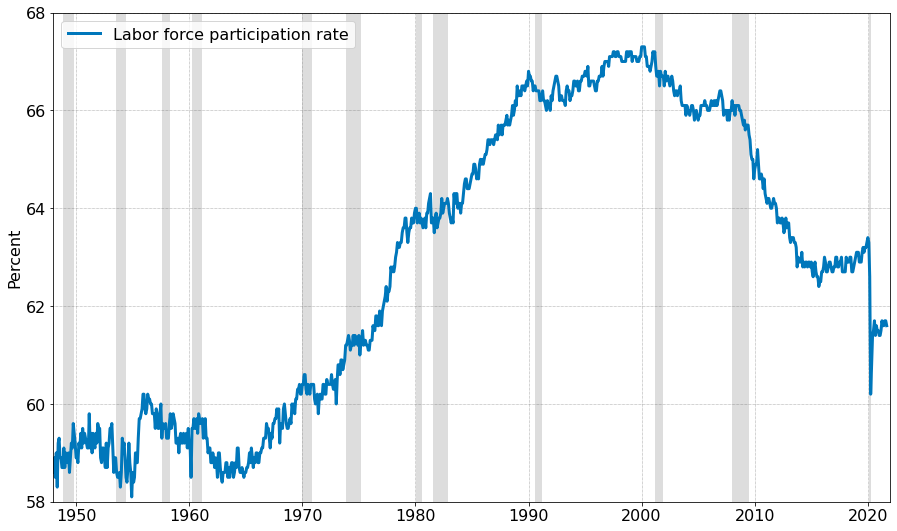

In [2]:
# labor force participation rate
data = myLoadDataFRED(series=['CIVPART'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [58,68],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [58,68]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['CIVPART'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Labor force participation rate')
x = ax.legend(loc='upper left')

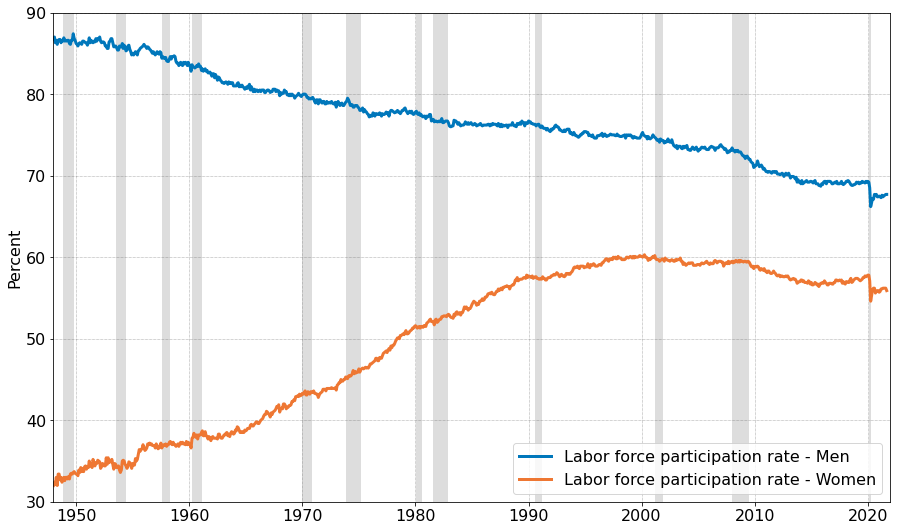

In [3]:
# labor force participation rate for men and women
data = myLoadDataFRED(series=['LNS11300001','LNS11300002'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [30,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [30,90]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['LNS11300001'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Labor force participation rate - Men')
ax.plot(data['year'],data['LNS11300002'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Labor force participation rate - Women')
x = ax.legend(loc='lower right')

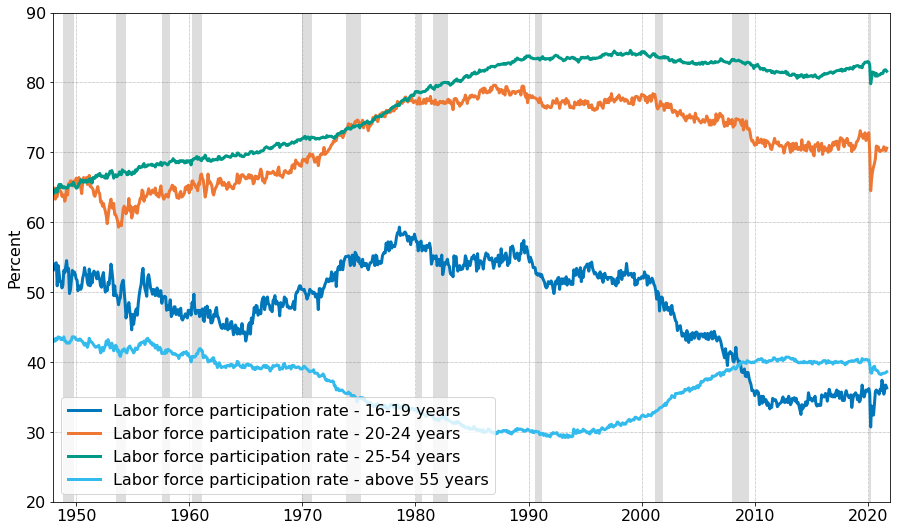

In [4]:
# labor force participation rate by age group
data = myLoadDataFRED(series=['LNS11300012', 'LNS11300036', 'LNS11300060', 'LNS11324230'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [20,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [20,90]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['LNS11300012'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Labor force participation rate - 16-19 years')
ax.plot(data['year'],data['LNS11300036'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Labor force participation rate - 20-24 years')
ax.plot(data['year'],data['LNS11300060'],
                    linewidth=3,marker='',color=myColor['tolVibrantTeal'],label='Labor force participation rate - 25-54 years')
ax.plot(data['year'],data['LNS11324230'],
                    linewidth=3,marker='',color=myColor['tolVibrantCyan'],label='Labor force participation rate - above 55 years')
x = ax.legend(loc='lower left')

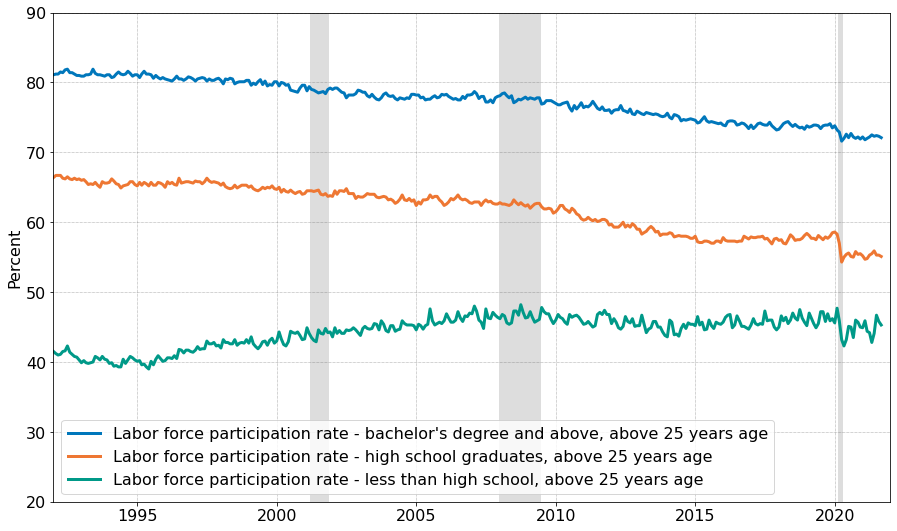

In [5]:
# labor force participation rate by education status
data = myLoadDataFRED(series=['LNS11327662', 'LNS11327660', 'LNS11327659'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1992,2022], 'ylim': [20,90],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [20,90]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['LNS11327662'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label="Labor force participation rate - bachelor's degree and above, above 25 years age")
ax.plot(data['year'],data['LNS11327660'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Labor force participation rate - high school graduates, above 25 years age')
ax.plot(data['year'],data['LNS11327659'],
                    linewidth=3,marker='',color=myColor['tolVibrantTeal'],label='Labor force participation rate - less than high school, above 25 years age')
x = ax.legend(loc='lower left')

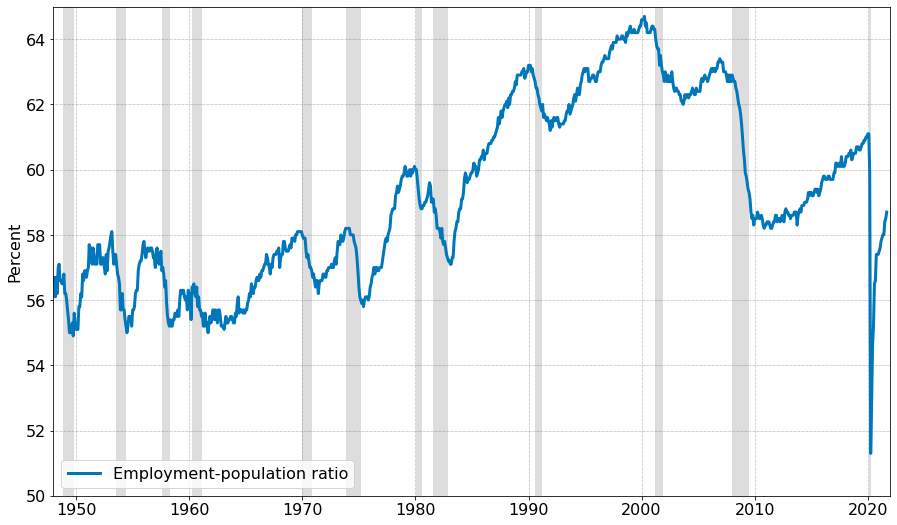

In [6]:
# employment-population ratio
data = myLoadDataFRED(series=['EMRATIO'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [50,65],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [50,65]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['EMRATIO'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Employment-population ratio')
x = ax.legend(loc='lower left')

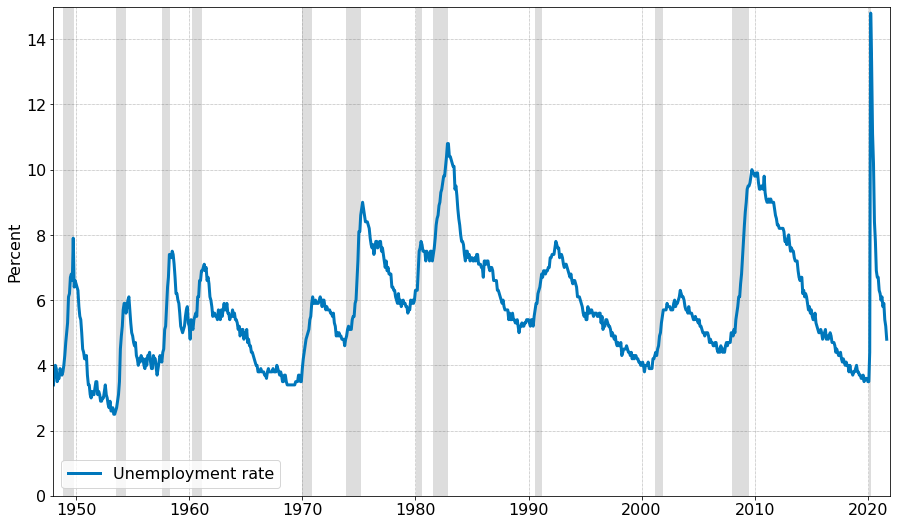

In [7]:
# unemployment rate
data = myLoadDataFRED(series=['UNRATE'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [0,15],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,15]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['UNRATE'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Unemployment rate')
x = ax.legend(loc='lower left')

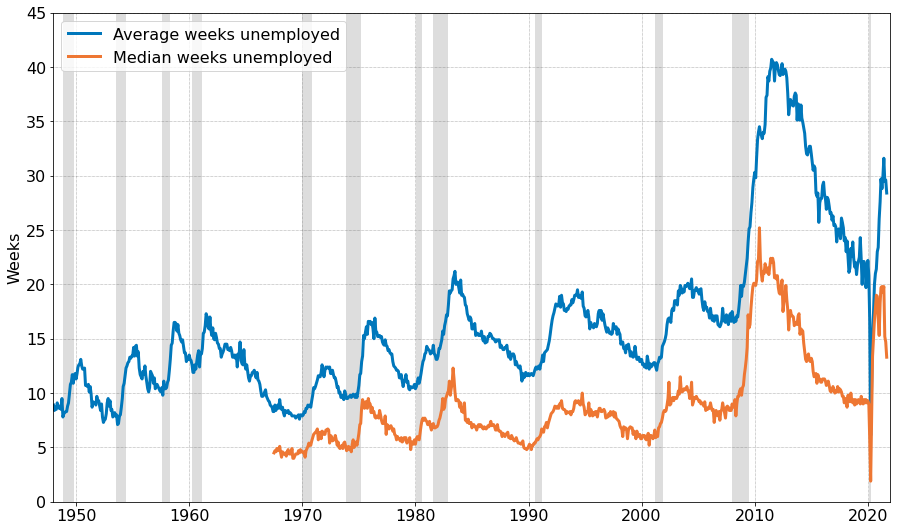

In [8]:
# unemployment spell length
data = myLoadDataFRED(series=['UEMPMEAN', 'UEMPMED'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1948,2022], 'ylim': [0,45],
         'xlabel': '', 'ylabel': 'Weeks',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,45]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['UEMPMEAN'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Average weeks unemployed')
ax.plot(data['year'],data['UEMPMED'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Median weeks unemployed')
x = ax.legend(loc='upper left')

# Eurostat data

In [9]:
# load data - large dataset, may load slowly
start = datetime.datetime(1950,1,1)
end = datetime.datetime(2030,1,1)
data = pdr.data.DataReader('une_rt_m','eurostat',start,end)

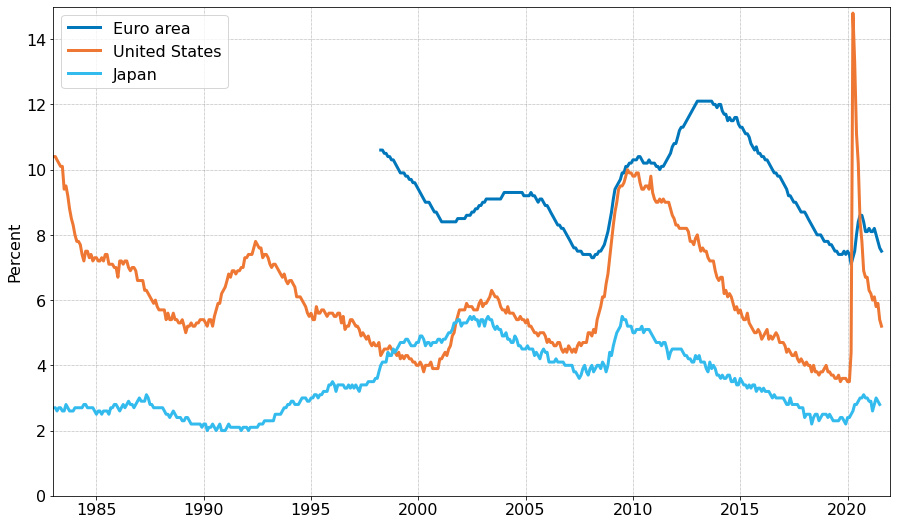

In [10]:
# process data - unemployment rates
country_list = {'Euro area':'Euro area - 19 countries  (from 2015)',
                'United States':'United States',
                'Japan':'Japan'}
d_def={}
d_def_frame = data.loc[:,('Percentage of population in the labour force',
                          'Seasonally adjusted data, not calendar adjusted data',
                          'Total','Total',slice(None))]
var = ['Percentage of population in the labour force',
       'Seasonally adjusted data, not calendar adjusted data',
       'Total','Total','','Monthly']

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1983,2022], 'ylim': [0,15],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,45]}

fig,ax = myGenerateTSPlot(param)

for ind,i in enumerate(country_list):
    var[4] = country_list[i]
    d_def[i] = d_def_frame.loc[:,tuple(var)].to_numpy()
    #if ind == 0:
    #    ax.plot(year_frac(d_def_frame.index),d_def[i],
    #                        '--',linewidth=3,marker='',color='#000000',label=i)
    #else:
    ax.plot(year_frac(d_def_frame.index),d_def[i],
                            '-',linewidth=3,marker='',color=clist_1[ind],label=i)
    
ax.legend(loc='upper left');

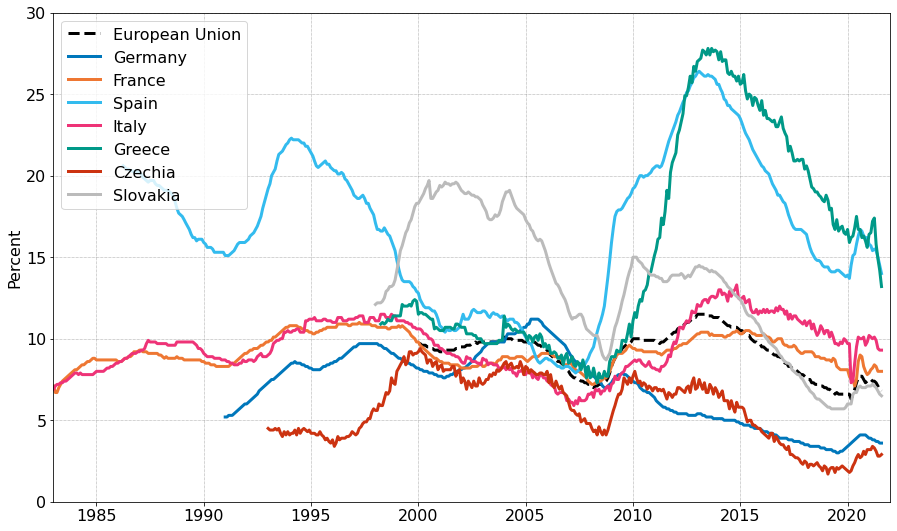

In [11]:
# process data - unemployment rates - more countries
country_list = {'European Union':'European Union - 27 countries (from 2020)',
                'Germany':'Germany (until 1990 former territory of the FRG)',
                'France':'France',
                'Spain':'Spain',
                'Italy':'Italy',
                'Greece':'Greece',
                'Czechia':'Czechia',
                'Slovakia':'Slovakia'}
d_def={}
d_def_frame = data.loc[:,('Percentage of population in the labour force',
                          'Seasonally adjusted data, not calendar adjusted data',
                          'Total','Total',slice(None))]
var = ['Percentage of population in the labour force',
       'Seasonally adjusted data, not calendar adjusted data',
       'Total','Total','','Monthly']

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [1983,2022], 'ylim': [0,30],
         'xlabel': '', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [0,45]}

fig,ax = myGenerateTSPlot(param)

for ind,i in enumerate(country_list):
    var[4] = country_list[i]
    d_def[i] = d_def_frame.loc[:,tuple(var)].to_numpy()
    if ind == 0:
        ax.plot(year_frac(d_def_frame.index),d_def[i],
                            '--',linewidth=3,marker='',color='#000000',label=i)
    else:
        ax.plot(year_frac(d_def_frame.index),d_def[i],
                            '-',linewidth=3,marker='',color=clist_1[ind-1],label=i)
    
ax.legend(loc='upper left');

# Worker flows and Beveridge curve

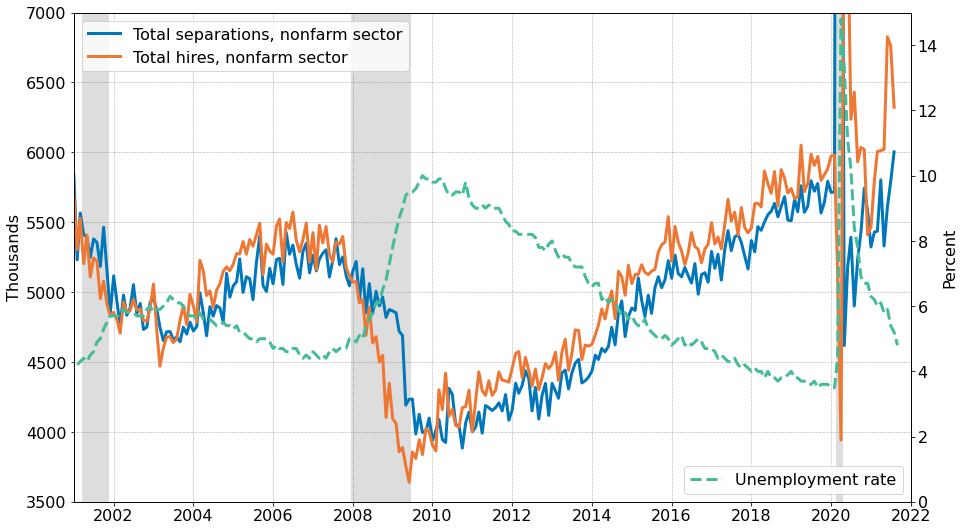

In [12]:
# hires and separations
data = myLoadDataFRED(series=['JTSTSL', 'JTSHIL', 'UNRATE'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2022], 'ylim': [3500,7000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [1000,7000]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['JTSTSL'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Total separations, nonfarm sector')
ax.plot(data['year'],data['JTSHIL'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Total hires, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')


# add right axis with epidemic data
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(data['year'],data['UNRATE'],
                    linewidth=3,marker='',linestyle='--',color=myColor['tolLightMint'],label='Unemployment rate')
ax2.set_ylim([0,15])
ax2.set_ylabel('Percent')
x = ax2.legend(loc='lower right')

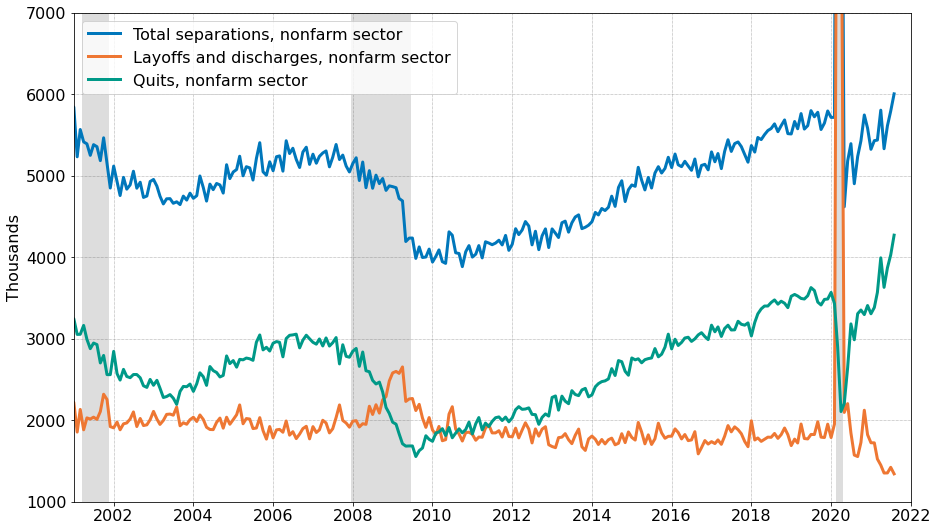

In [13]:
# hires and separations
data = myLoadDataFRED(series=['JTSTSL', 'JTSLDL', 'JTSQUL'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2022], 'ylim': [1000,7000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [1000,7000]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['JTSTSL'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Total separations, nonfarm sector')
ax.plot(data['year'],data['JTSLDL'],
                    linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='Layoffs and discharges, nonfarm sector')
ax.plot(data['year'],data['JTSQUL'],
                    linewidth=3,marker='',color=myColor['tolVibrantTeal'],label='Quits, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')

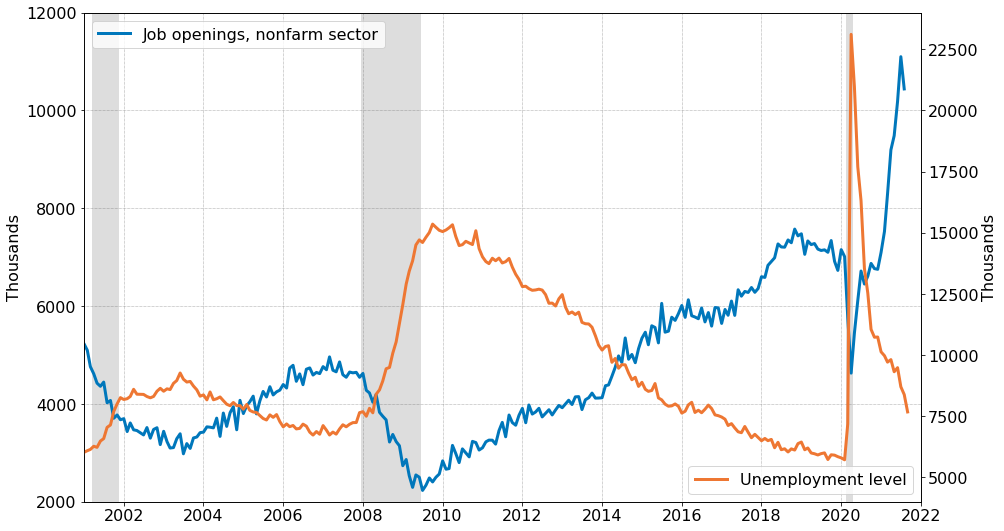

In [14]:
# hires and separations
data = myLoadDataFRED(series=['JTSJOL', 'UNEMPLOY'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [2001,2022], 'ylim': [2000,12000],
         'xlabel': '', 'ylabel': 'Thousands',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [2000,12000]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['JTSJOL'],
                    linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Job openings, nonfarm sector')
ax.set_xticks(np.linspace(2002,2022,11))
x = ax.legend(loc='upper left')


# add right axis with epidemic data
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(data['year'],data['UNEMPLOY'],
                    linewidth=3,marker='',linestyle='-',color=myColor['tolVibrantOrange'],label='Unemployment level')
ax2.set_ylim([4000,24000])
ax2.set_ylabel('Thousands')
x = ax2.legend(loc='lower right')

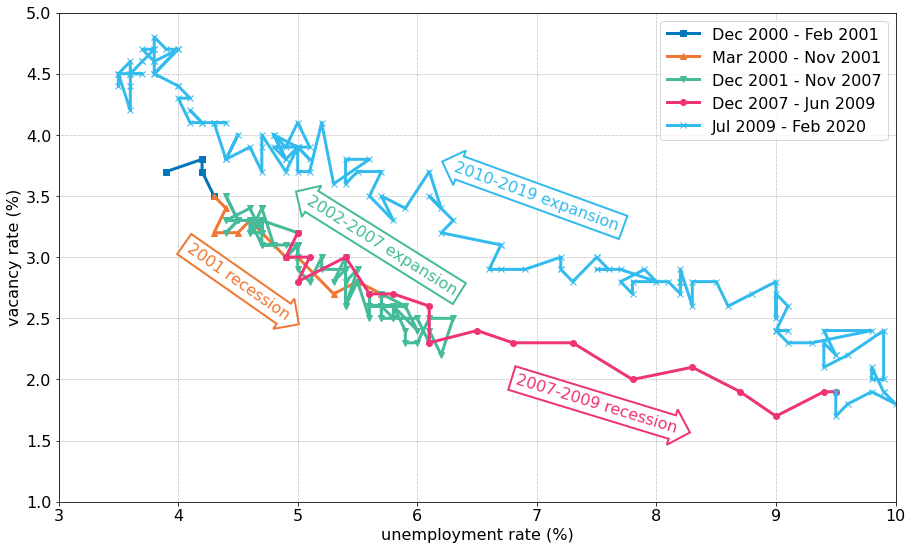

In [15]:
# Beveridge curve
data = myLoadDataFRED(series=['UNRATE','JTSJOR'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [3,10], 'ylim': [1,5],
         'xlabel': 'unemployment rate (%)', 'ylabel': 'vacancy rate (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = myGenerateTSPlot(param)

d = np.logical_and(data['year']>2000,data['year']<2001+2.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='s',color=myColor['tolVibrantBlue'],label='Dec 2000 - Feb 2001')

d = np.logical_and(data['year']>=2001+1.5/12,data['year']<2001+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='^',color=myColor['tolVibrantOrange'],label='Mar 2000 - Nov 2001')
ax.annotate('2001 recession',xy=(4.5,2.8),xycoords='data',
            rotation=-35,color=myColor['tolVibrantOrange'],
            bbox=dict(boxstyle="rarrow,pad=0.3", edgecolor=myColor['tolVibrantOrange'], facecolor=myColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2001+10.5/12,data['year']<2007+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='v',color=myColor['tolLightMint'],label='Dec 2001 - Nov 2007')
ax.annotate('2002-2007 expansion',xy=(5.7,3.1),xycoords='data',
            rotation=-32,color=myColor['tolLightMint'],
            bbox=dict(boxstyle="larrow,pad=0.3", edgecolor=myColor['tolLightMint'], facecolor=myColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2007+10.5/12,data['year']<2009+5.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='o',color=myColor['tolVibrantMagenta'],label='Dec 2007 - Jun 2009')
ax.annotate('2007-2009 recession',xy=(7.5,1.8),xycoords='data',
            rotation=-17,color=myColor['tolVibrantMagenta'],
            bbox=dict(boxstyle="rarrow,pad=0.3", edgecolor=myColor['tolVibrantMagenta'], facecolor=myColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

d = np.logical_and(data['year']>2009+4.5/12,data['year']<2020+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=myColor['tolVibrantCyan'],label='Jul 2009 - Feb 2020')
ax.annotate('2010-2019 expansion',xy=(7,3.5),xycoords='data',
            rotation=-20,color=myColor['tolVibrantCyan'],
            bbox=dict(boxstyle="larrow,pad=0.3", edgecolor=myColor['tolVibrantCyan'], facecolor=myColor['tolHighContrastWhite'], linewidth=2),
            horizontalalignment='center', verticalalignment='center')

x = ax.legend(loc='upper right')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed'], shrink=0.05))

#ax.annotate('2001 recession',
#            xy=(5.5,2),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
#            xytext=(4,3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
#            horizontalalignment='right', verticalalignment='bottom',
#            **style)



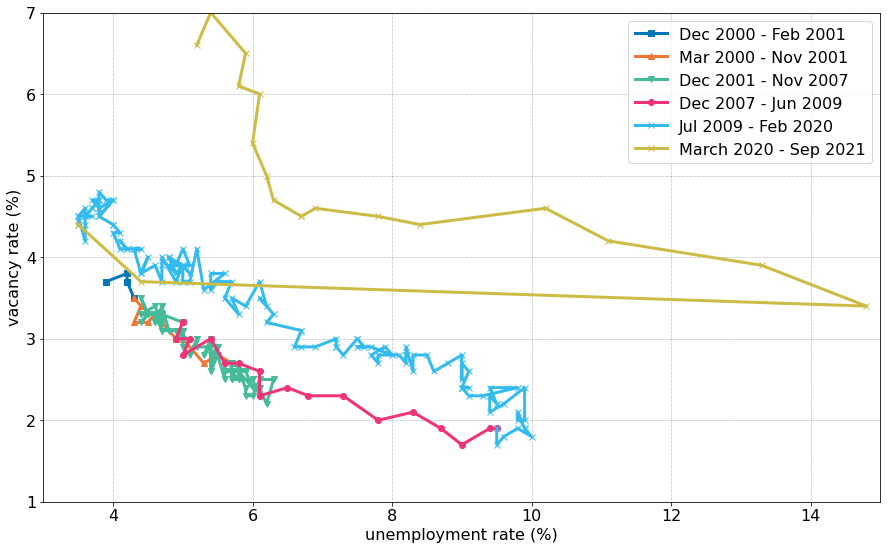

In [16]:
# Beveridge curve, including covid
data = myLoadDataFRED(series=['UNRATE','JTSJOR'],transform='none')

param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [3,15], 'ylim': [1,7],
         'xlabel': 'unemployment rate (%)', 'ylabel': 'vacancy rate (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = myGenerateTSPlot(param)

d = np.logical_and(data['year']>2000,data['year']<2001+2.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='s',color=myColor['tolVibrantBlue'],label='Dec 2000 - Feb 2001')
d = np.logical_and(data['year']>=2001+1.5/12,data['year']<2001+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='^',color=myColor['tolVibrantOrange'],label='Mar 2000 - Nov 2001')
d = np.logical_and(data['year']>2001+10.5/12,data['year']<2007+11.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='v',color=myColor['tolLightMint'],label='Dec 2001 - Nov 2007')
d = np.logical_and(data['year']>2007+10.5/12,data['year']<2009+5.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='o',color=myColor['tolVibrantMagenta'],label='Dec 2007 - Jun 2009')
d = np.logical_and(data['year']>2009+4.5/12,data['year']<2020+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=myColor['tolVibrantCyan'],label='Jul 2009 - Feb 2020')
d = np.logical_and(data['year']>2020+0.5/12,data['year']<2023+1.5/12)
ax.plot(data['UNRATE'][d],data['JTSJOR'][d],
                    linewidth=3,marker='x',color=myColor['tolBrightYellow'],label='March 2020 - Sep 2021')

x = ax.legend(loc='upper right')

# Model of redistribution

Text(1, 0.3, 'No redistribution')

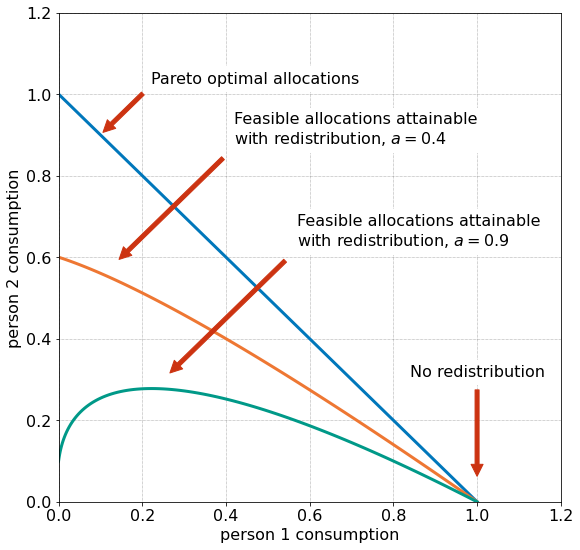

In [17]:
param = {'figsize' : [9,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,1.2], 'ylim': [0,1.2],
         'xlabel': 'person 1 consumption', 'ylabel': 'person 2 consumption',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': False, 'showNBERrecessions_y': [2000,12000]}

fig,ax = myGenerateTSPlot(param)

τ = np.linspace(0,1,100)

a = 0
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=myColor['tolVibrantBlue'],label=f'a = {a}')
a = 0.4
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=myColor['tolVibrantOrange'],label=f'a = {a}')
a = 0.9
ax.plot((1-τ)*(1-a*τ),τ*(1-a*τ),linewidth=3,marker='',color=myColor['tolVibrantTeal'],label=f'a = {a}')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed'], shrink=0.05))

ax.annotate('Pareto optimal allocations',
            xy=(0.1,0.9),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.22, 1.02), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('Feasible allocations attainable\nwith redistribution, $a = 0.4$',
            xy=(0.13,0.58),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.42, 0.87), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('Feasible allocations attainable\nwith redistribution, $a = 0.9$',
            xy=(0.25,0.3),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(0.57, 0.62), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',
            **style)

ax.annotate('No redistribution',
            xy=(1,0.05),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(1, 0.3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

#x = ax.legend(loc='lower left')